In [1]:
## Python Script for the Final Project, Stats 506 F20
##
## For adults who weigh less than they were 10 years ago, what nutrient
## intake and demographic factors are important for them now?
##
## Data source: National Health and Nutrition Examination Survey (NHANES)
## https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016
## https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018 
##
## Author: Yingyi Yang, yyingyi@umich.edu
## Updated: December 15, 2020

#! Limit lines to 79 characters with rare exceptions. 
# 79: -------------------------------------------------------------------------

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

### 1. Data preprocessing 

In [5]:
def prep_data(year):
    """
    Function to read nhanes data based on year codes and merge them into one 
    dataframe.
    Input: year - list of alphabet representing year of concern
    Output: a dataframe containing required covariates and response variable
    """
    
    base = 'data/'
    
    files = []
    
    var = [
        ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMDEDUC2', 'INDHHIN2'],
        ['SEQN', 'DR1DRSTZ', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 
         'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL'],
        ['SEQN', 'WHD020', 'WHD110']
    ]
    
    out = pd.DataFrame()
    for code in year:
        names = [x+'_'+code+'.XPT' for x in ['DEMO', 'DR1TOT', 'WHQ']]

        da = []
        for idf, fn in enumerate(names):
            df = pd.read_sas(os.path.join(base, fn))
            df = df.loc[:, var[idf]]
            da.append(df)
            
        dx = pd.merge(da[0], da[1], left_on='SEQN', right_on='SEQN')
        dx = pd.merge(dx, da[2], left_on='SEQN', right_on='SEQN')

        # encode sex groups
        dx['Female'] = (dx.RIAGENDR == 2).astype(np.int)   
        
        dx.dropna(inplace = True)
        out = out.append(dx)
    
    out['Wloss'] = (out['WHD020'] < out['WHD110']-5.0).astype(np.int)
    
    # remove values that are not reliable
    out = out[(out['DR1DRSTZ'] == 1) & (out['DMDEDUC2'] <= 5) &
             (out['INDHHIN2'] <= 15)]
    out.drop(['SEQN', 'RIAGENDR', 'WHD020', 'WHD110', 'DR1DRSTZ'], 
             axis=1, inplace=True)

    out.rename(columns={'RIAGENDR': 'Gender',
                        'RIDAGEYR': 'Age',
                        'DMDEDUC2': 'Education',
                        'INDHHIN2': 'Household income',
                        'DR1TKCAL': 'Energy',
                        'DR1TPROT': 'Protein', 
                        'DR1TCARB': 'Carbohydrate',
                        'DR1TSUGR': 'Sugars',
                        'DR1TFIBE': 'Fiber',
                        'DR1TTFAT': 'Fat',
                        'DR1TSFAT': 'Saturated fatty acids',
                        'DR1TMFAT': 'Monounsaturated fatty acids',
                        'DR1TPFAT': 'Polyunsaturated fatty acids',
                        'DR1TCHOL': 'Cholesterol'}, inplace=True)
    
    return out    

In [6]:
df = prep_data(['I','J'])
df.shape

(6711, 15)

In [14]:
df.describe()

,Age,Education,Household income,Energy,Protein,Carbohydrate,Sugars,Fiber,Fat,Saturated fatty acids,Monounsaturated fatty acids,Polyunsaturated fatty acids,Cholesterol,Female,Wloss
count,6711.000000,6711.000000,6711.000000,6711.000000,6.711000e+03,6711.000000,6711.000000,6.711000e+03,6.711000e+03,6.711000e+03,6.711000e+03,6.711000e+03,6.711000e+03,6711.000000,6711.000000
mean,58.217404,3.458948,8.765907,2039.135598,7.806023e+01,240.336953,102.646728,1.700720e+01,8.122784e+01,2.606828e+01,2.847412e+01,1.906056e+01,3.021512e+02,0.514230,0.276561
std,13.073219,1.273509,4.437431,928.826103,4.044824e+01,116.882857,71.519438,1.079495e+01,4.559851e+01,1.648985e+01,1.687224e+01,1.247847e+01,2.439198e+02,0.499835,0.447331
min,36.000000,1.000000,1.000000,14.000000,5.397605e-79,1.000000,0.500000,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,0.000000,0.000000
25%,47.000000,3.000000,5.000000,1396.000000,5.095500e+01,160.680000,54.900000,9.400000e+00,4.936000e+01,1.461800e+01,1.671150e+01,1.039700e+01,1.290000e+02,0.000000,0.000000
50%,59.000000,4.000000,8.000000,1897.000000,7.090000e+01,222.530000,87.970000,1.480000e+01,7.336000e+01,2.269100e+01,2.537300e+01,1.647300e+01,2.330000e+02,1.000000,0.000000
75%,68.000000,4.000000,14.000000,2521.500000,9.805000e+01,297.540000,132.820000,2.210000e+01,1.034550e+02,3.414150e+01,3.649200e+01,2.452350e+01,4.150000e+02,1.000000,1.000000
max,80.000000,5.000000,15.000000,8500.000000,5.452000e+02,1222.340000,980.920000,1.034000e+02,4.052200e+02,1.491460e+02,1.596990e+02,1.015430e+02,2.968000e+03,1.000000,1.000000


In [16]:
df.describe().T.to_csv('results/description.csv')

### 2. Feature selection 

In [8]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFE
import seaborn as sns

In [9]:
def featureSelection(data, n, method = 'Model_LR'):
    """
    Function to fit model and generate features based on the input method.
    Inputs: data - a dataframe containing covariates and response variable
            n - an integer representing top n important features
            method - a string containing feature selection method 
            (Model: model-based, RFE: recursive feature elimination) and model 
            (LR: logistic regression, tree: decision tree)
    Output: a figure or dataframe representing selected features
    """
 
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    
    # standardize columns of X
    scaler = preprocessing.StandardScaler()
    scaled_X = scaler.fit_transform(X)
    X = pd.DataFrame(scaled_X, columns=X.columns)
    
    if method == 'Model_LR':
        LR = sm.Logit(y.values.reshape(-1,1), X).fit()
        
        # select significant variables
        idx = (LR.pvalues < 0.1)
        coeffs = pd.DataFrame({'Feature coeffs':LR.params[idx]})
        
        coeffs = coeffs.iloc[(-coeffs['Feature coeffs'].abs()).argsort()
                   ].reset_index(level=0).rename(
                     columns={'index':'Feature name'}).iloc[:n,:]
        
        # output results
        coeffs.to_csv('results/Model_LR.csv')

        plt.figure(figsize=(6,6))
        plt.title("Coefficients")
        sns.barplot(x="Feature coeffs", y="Feature name", 
                    data=coeffs, palette='Blues')  
    
    if method == 'Model_tree':
        tree = DecisionTreeClassifier()
        tree.fit(X, y)      
        importances = tree.feature_importances_
        imp_df = pd.DataFrame({'Feature name':X.columns.values, 
                               'Feature importance':importances}
                             ).sort_values('Feature importance', 
                                           ascending=False).iloc[:n,:]
        
        # output results
        imp_df.to_csv('results/Model_tree.csv')

        plt.figure(figsize=(6,6))
        plt.title("Feature Importance")
        sns.barplot(x="Feature importance", y="Feature name", 
                    data=imp_df, palette='Blues')
        
    if method == 'RFE_LR':
        LR = LogisticRegression()
        trans = RFE(LR, n_features_to_select=n)
        X_trans = trans.fit_transform(X, y)
        features = X.columns.values[trans.get_support()]
        imp_df = pd.DataFrame(features)
        
        # output results
        imp_df.to_csv('results/RFE_LR.csv')
   
        for i in range(X.shape[1]):
            print('Variable: %s, Selected %s, Rank: %.3f' % 
                  (X.columns.values[i], trans.support_[i], trans.ranking_[i]))
        
    if method == 'RFE_tree':
        tree = DecisionTreeClassifier()
        trans = RFE(tree, n_features_to_select=n)
        X_trans = trans.fit_transform(X, y)
        features = X.columns.values[trans.get_support()]
        imp_df = pd.DataFrame(features)
        
        # output results
        imp_df.to_csv('results/RFE_tree.csv')
        
        for i in range(X.shape[1]):
            print('Variable: %s, Selected %s, Rank: %.3f' % 
                  (X.columns.values[i], trans.support_[i], trans.ranking_[i]))       

### 3. Results visualization 

Optimization terminated successfully.
         Current function value: 0.676256
         Iterations 4


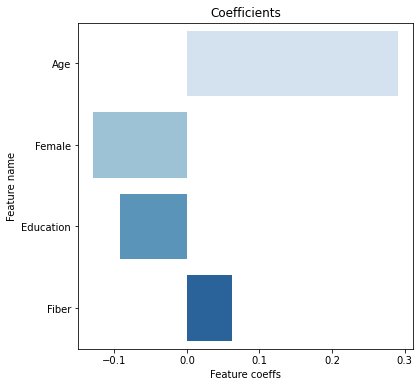

In [20]:
featureSelection(df, 5, 'Model_LR')

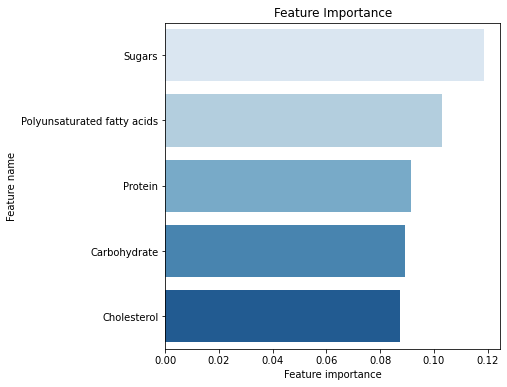

In [19]:
featureSelection(df, 5, 'Model_tree')

In [18]:
featureSelection(df, 5, 'RFE_LR')

Variable: Age, Selected True, Rank: 1.000
Variable: Education, Selected False, Rank: 3.000
Variable: Household income, Selected False, Rank: 6.000
Variable: Energy, Selected True, Rank: 1.000
Variable: Protein, Selected False, Rank: 7.000
Variable: Carbohydrate, Selected False, Rank: 10.000
Variable: Sugars, Selected False, Rank: 8.000
Variable: Fiber, Selected False, Rank: 5.000
Variable: Fat, Selected True, Rank: 1.000
Variable: Saturated fatty acids, Selected False, Rank: 4.000
Variable: Monounsaturated fatty acids, Selected True, Rank: 1.000
Variable: Polyunsaturated fatty acids, Selected False, Rank: 2.000
Variable: Cholesterol, Selected False, Rank: 9.000
Variable: Female, Selected True, Rank: 1.000


In [21]:
featureSelection(df, 5, 'RFE_tree')

Variable: Age, Selected False, Rank: 6.000
Variable: Education, Selected False, Rank: 9.000
Variable: Household income, Selected False, Rank: 8.000
Variable: Energy, Selected False, Rank: 3.000
Variable: Protein, Selected False, Rank: 4.000
Variable: Carbohydrate, Selected True, Rank: 1.000
Variable: Sugars, Selected True, Rank: 1.000
Variable: Fiber, Selected False, Rank: 2.000
Variable: Fat, Selected False, Rank: 7.000
Variable: Saturated fatty acids, Selected True, Rank: 1.000
Variable: Monounsaturated fatty acids, Selected True, Rank: 1.000
Variable: Polyunsaturated fatty acids, Selected False, Rank: 5.000
Variable: Cholesterol, Selected True, Rank: 1.000
Variable: Female, Selected False, Rank: 10.000
